In [1]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.metrics.pairwise import euclidean_distances

import scipy.sparse

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize, pos_tag

import pandas as pd

# Categorical features to numeric/binary values

In [9]:
onehot_encoder = DictVectorizer()
instances = [
    {'city': 'New York', 'population': 1},
    {'city': 'San Francisco', 'population': 2},
    {'city': 'Chapel Hill', 'population': 3}
]
print(onehot_encoder.fit_transform(instances).toarray())
print(onehot_encoder.get_feature_names())

[[ 0.  1.  0.  1.]
 [ 0.  0.  1.  2.]
 [ 1.  0.  0.  3.]]
['city=Chapel Hill', 'city=New York', 'city=San Francisco', 'population']


In [23]:
df = pd.read_csv('datasets/kaggle/DisplayAdvertisingChallenge/old/small_train.txt',
                 sep='\t',
                 names=['x'+str(idx) for idx in range(1,41)])

In [24]:
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40'],
      dtype='object')

In [26]:
df_dict = df.to_dict(orient='records')

In [27]:
onehot_encoder = DictVectorizer()
df_onehot = onehot_encoder.fit_transform(df_dict).toarray()
print(onehot_encoder.get_feature_names())

['x1', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15=015405ad', 'x15=05db9164', 'x15=09ca0b81', 'x15=0a16e1d4', 'x15=0e78bd46', 'x15=127f4a6b', 'x15=1464facd', 'x15=16a99cfb', 'x15=16daa0d9', 'x15=17f69355', 'x15=18988050', 'x15=193aaa40', 'x15=1a5f926e', 'x15=1ad80dae', 'x15=23b5cf30', 'x15=241546e0', 'x15=24eda356', 'x15=264a0d24', 'x15=287e684f', 'x15=28e55712', 'x15=291b7ba2', 'x15=2998a458', 'x15=2b214387', 'x15=2b3bff44', 'x15=2b92c0d2', 'x15=2bc6e997', 'x15=2d2569cb', 'x15=2d4ea12b', 'x15=2d7f48dd', 'x15=2d9f2802', 'x15=2e17df97', 'x15=33f1b298', 'x15=340c148e', 'x15=34f74dfd', 'x15=3560b08b', 'x15=36a5b3ff', 'x15=38e415c5', 'x15=394fc830', 'x15=39af2607', 'x15=3b65d647', 'x15=3c9d8785', 'x15=3cc2325b', 'x15=3d511d91', 'x15=41edac3d', 'x15=4265881a', 'x15=42a16b9a', 'x15=439a44a4', 'x15=43b5ce4b', 'x15=45cb84c9', 'x15=46300ee3', 'x15=47665609', 'x15=489d0f96', 'x15=49807078', 'x15=4a4e85c4', 'x15=4a7d3223', 'x15=4ae3b244', 'x15=50d4de26', 'x15=53b720b4', 'x15=554adfdb', 'x15=561bf9d4'

In [28]:
df_onehot

array([[   0.,  181.,    1., ...,    4.,   15.,    2.],
       [   0.,    4.,    1., ...,    8.,    2.,    2.],
       [   0.,  245.,    1., ...,   89.,    4.,    2.],
       ..., 
       [   0.,  101.,    2., ...,   17.,  110.,    4.],
       [   1.,    7.,    1., ...,    7.,    6.,    7.],
       [   1.,   32.,   nan, ...,   63.,    9.,    4.]])

# Extracting text features

In [2]:
corpus = [
    'UNC played Duke in basketball',
    'Duke lost the basketball game',
    'I ate a sandwich'
]

In [3]:
vectorizer = CountVectorizer()
sp_corpus = vectorizer.fit_transform(corpus)
print("corpus vocabulary: ", vectorizer.vocabulary_)
print("corpus:")
print(sp_corpus.todense())

corpus vocabulary:  {'in': 4, 'played': 6, 'sandwich': 7, 'game': 3, 'duke': 2, 'unc': 9, 'basketball': 1, 'lost': 5, 'ate': 0, 'the': 8}
corpus:
[[0 1 1 0 1 0 1 0 0 1]
 [0 1 1 1 0 1 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0]]


In [11]:
euclidean_distances(sp_corpus)

array([[ 0.        ,  2.44948974,  2.64575131],
       [ 2.44948974,  0.        ,  2.64575131],
       [ 2.64575131,  2.64575131,  0.        ]])

### Filter using stop words

In [12]:
vectorizer = CountVectorizer(stop_words='english')
sp_corpus = vectorizer.fit_transform(corpus)
print("corpus vocabulary: ", vectorizer.vocabulary_)
print("corpus:")
print(sp_corpus.todense())
euclidean_distances(sp_corpus)

corpus vocabulary:  {'sandwich': 6, 'played': 5, 'game': 3, 'duke': 2, 'unc': 7, 'lost': 4, 'ate': 0, 'basketball': 1}
corpus:
[[0 1 1 0 0 1 0 1]
 [0 1 1 1 1 0 0 0]
 [1 0 0 0 0 0 1 0]]


array([[ 0.        ,  2.        ,  2.44948974],
       [ 2.        ,  0.        ,  2.44948974],
       [ 2.44948974,  2.44948974,  0.        ]])

### Lemmatize and stem

In [26]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

corpus = [
    'He ate the sandwiches',
    'Every sandwich was eaten by him'
]

wordnet_tags = ['n', 'v']
def lemmatize(token, tag):
    if tag[0].lower() in wordnet_tags:
        return lemmatizer.lemmatize(token, tag[0].lower())
    return token

for doc in corpus:
    stemmed = [stemmer.stem(word) for word in word_tokenize(doc)]
    tagged_doc= pos_tag(word_tokenize(doc))
    lemmatized = [lemmatize(token, tag) for token, tag in tagged_doc]
    print("stemmed: ", stemmed)
    print("lemmatized: ", lemmatized)

stemmed:  ['He', 'ate', 'the', 'sandwich']
lemmatized:  ['He', 'eat', 'the', 'sandwich']
stemmed:  ['Everi', 'sandwich', 'wa', 'eaten', 'by', 'him']
lemmatized:  ['Every', 'sandwich', 'be', 'eat', 'by', 'him']


### Term frequencies

In [33]:
corpus = ['The dog ate a sandwich, the wizard transfigured a sandwich, and I ate a sandwich']
vectorizer = CountVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())
print("corpus vocabulary: ", vectorizer.vocabulary_)

[[2 1 3 1 1]]
corpus vocabulary:  {'dog': 1, 'wizard': 4, 'ate': 0, 'transfigured': 3, 'sandwich': 2}


In [36]:
corpus = [
    'He ate the sandwiches',
    'Every sandwich was eaten by him'
]
vectorizer = TfidfVectorizer(stop_words='english')
print(vectorizer.fit_transform(corpus).todense())

[[ 0.70710678  0.          0.          0.70710678]
 [ 0.          0.70710678  0.70710678  0.        ]]


### HashingVectorizer for large / streaming inputs

In [76]:
vec = HashingVectorizer()
scipy.sparse.find(vec.transform(['this simple test']))

(array([0, 0, 0], dtype=int32),
 array([127135, 170062, 273901], dtype=int32),
 array([-0.57735027,  0.57735027, -0.57735027]))

In [73]:
scipy.sparse.find(vec.transform(['this simple test is good']))

(array([0, 0, 0, 0, 0], dtype=int32),
 array([ 98369, 127135, 144749, 170062, 273901], dtype=int32),
 array([ 0.4472136, -0.4472136,  0.4472136,  0.4472136, -0.4472136]))

In [70]:
vec.transform(['this simple test is good']).nnz

5

In [81]:
scipy.sparse.find(vec.transform(['this simple test', 'this simple fest']))

(array([0, 0, 0, 1, 1, 1], dtype=int32),
 array([127135, 170062, 273901, 127135, 170062, 417969], dtype=int32),
 array([-0.57735027,  0.57735027, -0.57735027, -0.57735027,  0.57735027,
         0.57735027]))

# Extracting Image features

In [2]:
from sklearn import datasets
import numpy as np

In [85]:
digits = datasets.load_digits()
print('Digit:', digits.target[0])
print(digits.images[0])
print('Feature vector:\n', digits.images[0].reshape(-1, 64))

Digit: 0
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
Feature vector:
 [[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]]


### Points of interest

In [3]:
from skimage.feature import corner_harris, corner_peaks
from skimage.color import rgb2gray
from skimage.exposure import equalize_hist
import skimage.io as io
import matplotlib.pyplot as plt
import matplotlib

def show_corners(corners, image):
    fig = plt.figure()
    plt.gray()
    plt.imshow(image)
    y_corner, x_corner = zip(*corners)
    plt.plot(x_corner, y_corner, 'or')
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)
    fig.set_size_inches(np.array(fig.get_size_inches()) * 1.5)
    plt.show()

(480, 480, 3)

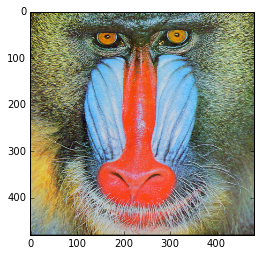

In [4]:
mandrill = io.imread('mandrill.png')
plt.imshow(mandrill)
mandrill.shape

(480, 480)

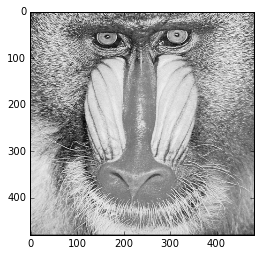

In [5]:
mandrill = rgb2gray(mandrill)
plt.imshow(mandrill, cmap = matplotlib.cm.Greys_r)
mandrill.shape

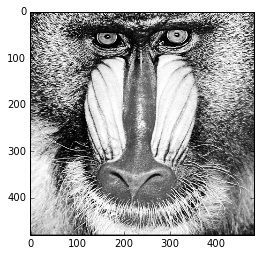

In [6]:
mandrill = equalize_hist(mandrill)
plt.imshow(mandrill, cmap = matplotlib.cm.Greys_r)

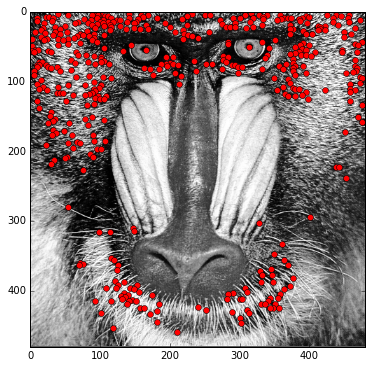

In [7]:
corners = corner_peaks(corner_harris(mandrill), min_distance=2)
show_corners(corners, mandrill)

### SIFT and SURF

In [9]:
import mahotas as mh
from mahotas.features import surf

In [10]:
img = mh.imread('mandrill.png', as_grey=True)
img

array([[ 140.94,   52.74,   50.95, ...,  118.32,  148.86,  176.18],
       [ 113.56,   94.42,   36.29, ...,  123.93,  142.32,  121.42],
       [  76.67,  113.31,   43.22, ...,   95.65,   84.48,   77.11],
       ..., 
       [ 135.41,  143.64,  144.62, ...,   85.54,   88.23,   80.12],
       [ 157.99,  143.1 ,  132.5 , ...,   80.14,   81.89,   71.06],
       [  17.61,   16.92,   22.23, ...,    9.17,    7.37,    6.78]])

In [13]:
print('The first SURF descriptor:\n', surf.surf(img)[0])

The first SURF descriptor:
 [  1.04774604e+02   2.68301415e+02   4.69097234e+00   3.61463256e+02
   1.00000000e+00  -1.97366943e+00   2.56796907e-03  -1.14117922e-03
   2.61967238e-03   1.98686446e-03   3.03796838e-02  -1.74723446e-02
   3.03796838e-02   1.76791003e-02   4.26463949e-02  -1.91302572e-02
   4.26463949e-02   1.91302572e-02   7.88132416e-03  -3.19042161e-03
   7.88132416e-03   3.19042161e-03   2.23481311e-02  -1.70713335e-02
   2.23481311e-02   1.87500153e-02   3.57937308e-01  -1.26270734e-01
   3.57937308e-01   1.73674053e-01   4.66307167e-01  -1.07538378e-01
   4.66372219e-01   1.11932457e-01   5.40903456e-02  -1.88713561e-02
   5.40903456e-02   1.99242279e-02   2.38443695e-02  -8.14088788e-03
   2.64239508e-02   1.48839605e-02   1.39691061e-01  -6.43369235e-02
   1.82770395e-01   1.18816083e-01   1.78859751e-01  -1.63724397e-01
   2.05869042e-01   1.75354606e-01   5.51178778e-02  -2.21721144e-02
   5.51178778e-02   2.21721144e-02   5.54875902e-03  -1.48808747e-03
   5.5

In [15]:
print('Extracted %s SURF descriptors' % len(surf.surf(img)))

Extracted 895 SURF descriptors


# Data Standardization

In [17]:
from sklearn import preprocessing

In [34]:
A = np.random.rand(10, 5)
A

array([[ 0.28806486,  0.88671149,  0.09536568,  0.28456835,  0.87688206],
       [ 0.34698681,  0.74632214,  0.44390001,  0.99259938,  0.87282938],
       [ 0.33966695,  0.84089295,  0.14495948,  0.60348939,  0.26838614],
       [ 0.59348493,  0.36031559,  0.13104422,  0.35593805,  0.92599817],
       [ 0.93020164,  0.8351275 ,  0.66916016,  0.35382441,  0.07439331],
       [ 0.37523168,  0.08079926,  0.29442217,  0.26414871,  0.59009734],
       [ 0.45928556,  0.74502495,  0.59467099,  0.0501589 ,  0.72090745],
       [ 0.31535234,  0.22342252,  0.8238104 ,  0.72654949,  0.15004251],
       [ 0.33886787,  0.80307558,  0.62159761,  0.42241305,  0.0196606 ],
       [ 0.67688891,  0.76373929,  0.3283776 ,  0.00697493,  0.3153495 ]])

In [35]:
B = preprocessing.scale(A)
B

array([[-0.90873748,  0.93237914, -1.32009271, -0.42635851,  1.1721462 ],
       [-0.60849583,  0.42536076,  0.1205705 ,  2.0582484 ,  1.16013305],
       [-0.64579477,  0.76690477, -1.11509723,  0.69279217, -0.63158859],
       [ 0.64755565, -0.96870801, -1.17261581, -0.17590953,  1.31773869],
       [ 2.36332337,  0.74608273,  1.05168112, -0.18332668, -1.20663207],
       [-0.46457176, -1.9781857 , -0.49729466, -0.49801466,  0.32204424],
       [-0.03626827,  0.42067596,  0.74378086, -1.248943  ,  0.70979827],
       [-0.76969186, -1.46309951,  1.69092637,  1.12463197, -0.98238884],
       [-0.64986653,  0.63032674,  0.8550818 ,  0.05736308, -1.36887356],
       [ 1.07254748,  0.48826311, -0.35694023, -1.40048324, -0.4923774 ]])

In [43]:
np.mean(A), np.mean(B)

(0.47943964564256475, 1.432187701766452e-16)

In [40]:
C = np.array([1,2,3,4,5])
D = preprocessing.scale(C)
D

/opt/conda/lib/python3.4/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [41]:
np.mean(D)

0.0